In [1]:
# project: p8
# submitter: ytian83
# partner: None

In [2]:
import csv
def get_mapping(path):
    exampleFile = open(path, encoding="utf-8")
    exampleReader = csv.reader(exampleFile)
    exampleData = dict(exampleReader)
    exampleFile.close()
    return exampleData

def get_raw_movies(path):
    file = open(path, encoding='utf-8')
    file_reader = csv.reader(file)
    path_data = list(file_reader)
    file.close()
    header = path_data[0]
    path_data = path_data[1:]
    get_movies=[]
    for idx in path_data:
        dict_temp = {}
        for i in range(len(header)):
            if i>=3:
                dict_temp[header[i]]=idx[i].split(",")
            elif i==1:
                dict_temp[header[i]]=int(idx[i])
            elif i==2:
                dict_temp[header[i]]=float(idx[i])
            else:  
                dict_temp[header[i]]=idx[i]
        get_movies.append(dict_temp)
    return get_movies
        

    

In [3]:
#q1

mapping=get_mapping("small_mapping.csv")
mapping

{'nm0000131': 'John Cusack',
 'nm0000154': 'Mel Gibson',
 'nm0000163': 'Dustin Hoffman',
 'nm0000418': 'Danny Glover',
 'nm0000432': 'Gene Hackman',
 'nm0000997': 'Gary Busey',
 'nm0001149': 'Richard Donner',
 'nm0001219': 'Gary Fleder',
 'nm0752751': 'Mitchell Ryan',
 'tt0313542': 'Runaway Jury',
 'tt0093409': 'Lethal Weapon'}

In [4]:
#q2
mapping["nm0752751"]

'Mitchell Ryan'

In [5]:
#q3
a=[]
for i in mapping:
    if "nm" in i:
        a.append(mapping[i])
        
a

['John Cusack',
 'Mel Gibson',
 'Dustin Hoffman',
 'Danny Glover',
 'Gene Hackman',
 'Gary Busey',
 'Richard Donner',
 'Gary Fleder',
 'Mitchell Ryan']

In [6]:
#q4
b=[]
for i in mapping :
    if "Gary" in mapping[i] or "gary" in mapping[i]:
        b.append(i)

b

['nm0000997', 'nm0001219']

In [7]:
#q5
movies=get_raw_movies("small_movies.csv")
movies

[{'title': 'tt0313542',
  'year': 2003,
  'rating': 7.1,
  'directors': ['nm0001219'],
  'actors': ['nm0000131', 'nm0000432', 'nm0000163'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'tt0093409',
  'year': 1987,
  'rating': 7.6,
  'directors': ['nm0001149'],
  'actors': ['nm0000154', 'nm0000418', 'nm0000997', 'nm0752751'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [8]:
#q6
len(movies[0]["genres"])

3

In [9]:
#q7
movies[1]["actors"][-1]

'nm0752751'

In [10]:
#q8
def get_movies(movies_path, mapping_path):
    mapping=get_mapping(mapping_path)
    movies=get_raw_movies(movies_path)
    for idx in movies:
        for i in idx:
             if "tt" or "nm" in idx[i]:
                if type(idx[i])==str :
                    idx[i]=mapping[str(idx[i])]
                if i == "actors"or i== "directors":
                    for a in range(len(idx[i])):
                        idx[i][a]=mapping[str(idx[i][a])]
    return movies
    
small=get_movies("small_movies.csv", "small_mapping.csv")

small[0]["title"]

'Runaway Jury'

In [48]:
#q9
small[1]["actors"]


['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan']

In [12]:
#q10
small[-1]["directors"]

['Richard Donner']

In [13]:
#q11
small

[{'title': 'Runaway Jury',
  'year': 2003,
  'rating': 7.1,
  'directors': ['Gary Fleder'],
  'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'Lethal Weapon',
  'year': 1987,
  'rating': 7.6,
  'directors': ['Richard Donner'],
  'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [14]:
movies = get_movies("movies.csv", "mapping.csv")

In [15]:
#q12
movies[0:3]

[{'title': 'The Big Wedding',
  'year': 2013,
  'rating': 5.6,
  'directors': ['Justin Zackham'],
  'actors': ['Robert De Niro'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Affair of the Necklace',
  'year': 2001,
  'rating': 6.1,
  'directors': ['Charles Shyer'],
  'actors': ['Simon Baker', 'Jonathan Pryce', 'Adrien Brody'],
  'genres': ['Drama', 'History', 'Romance']},
 {'title': 'The Barefoot Executive',
  'year': 1971,
  'rating': 6.0,
  'directors': ['Robert Butler'],
  'actors': ['Kurt Russell', 'Joe Flynn', 'Harry Morgan', 'Wally Cox'],
  'genres': ['Comedy', 'Family']}]

In [16]:
#q13
movies[-3:]

[{'title': 'Fortitude and Glory: Angelo Dundee and His Fighters',
  'year': 2012,
  'rating': 7.2,
  'directors': ['Chris Tasara'],
  'actors': ['Angelo Dundee', 'George Foreman', 'Freddie Roach'],
  'genres': ['Sport']},
 {'title': 'Ivanhoe',
  'year': 1952,
  'rating': 6.8,
  'directors': ['Richard Thorpe'],
  'actors': ['Robert Taylor', 'George Sanders'],
  'genres': ['Adventure', 'Drama', 'History']},
 {'title': 'The Great Gatsby',
  'year': 1949,
  'rating': 6.6,
  'directors': ['Elliott Nugent'],
  'actors': ['Alan Ladd', 'Macdonald Carey'],
  'genres': ['Drama']}]

In [17]:
# you are not allowed to change this function
def filter_movies_by_year(movies, year):
    i = 0
    while i < len(movies):
        if movies[i]["year"] != year:
            movies.pop(i)
        else:
            i += 1
    return movies

In [18]:
#q14
import copy
movies14=copy.copy(movies)
filter_movies_by_year(movies14,1931)

[{'title': 'Arizona',
  'year': 1931,
  'rating': 6.0,
  'directors': ['George B. Seitz'],
  'actors': ['John Wayne', 'Forrest Stanley'],
  'genres': ['Drama', 'Romance']},
 {'title': 'City Lights',
  'year': 1931,
  'rating': 8.5,
  'directors': ['Charles Chaplin'],
  'actors': ['Charles Chaplin', 'Harry Myers'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Range Feud',
  'year': 1931,
  'rating': 5.8,
  'directors': ['D. Ross Lederman'],
  'actors': ['Buck Jones', 'John Wayne', 'Edward LeSaint'],
  'genres': ['Mystery', 'Western']}]

In [19]:
#q15
movies15=copy.copy(movies)
filter_movies_by_year(movies15,1932)

[{'title': 'Texas Cyclone',
  'year': 1932,
  'rating': 6.2,
  'directors': ['D. Ross Lederman'],
  'actors': ['Wallace MacDonald', 'Tim McCoy', 'Wheeler Oakman', 'John Wayne'],
  'genres': ['Action', 'Western']},
 {'title': 'Haunted Gold',
  'year': 1932,
  'rating': 5.5,
  'directors': ['Mack V. Wright'],
  'actors': ['Otto Hoffman',
   'John Wayne',
   'Duke',
   'Harry Woods',
   'Erville Alderson'],
  'genres': ['Horror', 'Mystery', 'Western']},
 {'title': 'Girl Crazy',
  'year': 1932,
  'rating': 6.3,
  'directors': ['William A. Seiter'],
  'actors': ['Bert Wheeler', 'Robert Woolsey', 'Eddie Quillan'],
  'genres': ['Comedy']},
 {'title': 'Hot Saturday',
  'year': 1932,
  'rating': 6.6,
  'directors': ['William A. Seiter'],
  'actors': ['Cary Grant', 'Randolph Scott', 'Edward Woods'],
  'genres': ['Drama', 'Romance']},
 {'title': 'Lady and Gent',
  'year': 1932,
  'rating': 5.7,
  'directors': ['Stephen Roberts'],
  'actors': ['Morgan Wallace',
   'George Bancroft',
   'Charles St

In [20]:
#q16
def get_column(col_name):
    x=[]
    for i in movies:
        for a in i[col_name]:
            x.append(a)
    return list(set(x))

len(get_column("genres"))

18

In [21]:
#q17
len(get_column("directors"))

1247

In [22]:
#q18
b={}
name=None
for i in movies:
    b[i["title"]]=len(i["actors"])
highest=0
for i in b:
    if b[i]>=highest:
        highest= b[i]
        name=i
name

'Shoulder Arms'

In [23]:
#q19
rating=[]
for i in movies:
    rating.append(i["rating"])
average_rating=sum(rating)/len(rating)
average_rating

6.401659528907912

In [24]:
#q20
y={}
for idx in movies:
    y[idx["title"]]=len(idx["title"])
longest=0
name=None
for i in y:
    if y[i]>longest:
        longest=y[i]
        name=i
name
    


'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb'

In [25]:
#q21

test_movies = [
{"title": "A", "year": 2018, "style": "short", "genres": ["g1"]},
{"title": "B", "year": 2018, "style": "long",  "genres": ["g2"]},
{"title": "C", "year": 2019, "style": "short", "genres": ["g3"]},
{"title": "D", "year": 2019, "style": "long", "genres": ["g1", "g2", "g3"]},
]

def bucketize(movie_list, movie_key):
    # TODO: return dict of lists of movie dicts
    x={}
    for i in movie_list:
        if type(i[movie_key]) ==list:
            for idx in i[movie_key]:
                a=str(idx)
                if not a in x:
                    x[a]=[]
                    x[a].append(i)
                else:
                    x[a].append(i)
        elif not i[movie_key] in x: 
            x[i[movie_key]]=[]
            x[i[movie_key]].append(i)
        else:
            x[i[movie_key]].append(i)
    return x

bucketize(test_movies, "year")

{2018: [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']}],
 2019: [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [26]:
#q22
bucketize(test_movies, "style")

{'short': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']}],
 'long': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [27]:
#q23
bucketize(test_movies, "genres")

{'g1': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g2': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g3': [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [28]:
#q24
bucketize(small, "genres")

{'Crime': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
   'genres': ['Action', 'Crime', 'Thriller']}],
 'Drama': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']}],
 'Thriller': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson',

In [29]:
#q25
bucketize(small, "actors")
len(bucketize(small, "actors"))

7

In [30]:
#q26
bucketize(movies, "actors")
len(bucketize(movies, "actors"))

2605

In [31]:
#q27
a=bucketize(movies,"genres")
b={}
for i in a:
    b[i]=len(a[i])
b

{'Comedy': 485,
 'Drama': 1094,
 'Romance': 352,
 'History': 73,
 'Family': 85,
 'Mystery': 121,
 'Thriller': 250,
 'Action': 299,
 'Crime': 357,
 'Adventure': 283,
 'Western': 226,
 'Music': 38,
 'Animation': 45,
 'Sport': 48,
 'Fantasy': 59,
 'War': 99,
 'Sci-Fi': 69,
 'Horror': 85}

In [32]:
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [33]:
import matplotlib, pandas

def plot_dict(d, label="Please Label Me!!!"):
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(label, fontsize=16)

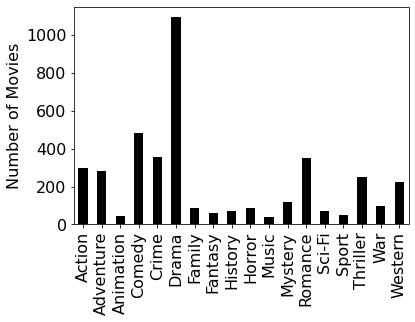

In [34]:
#q28
plot_dict(b, "Number of Movies")

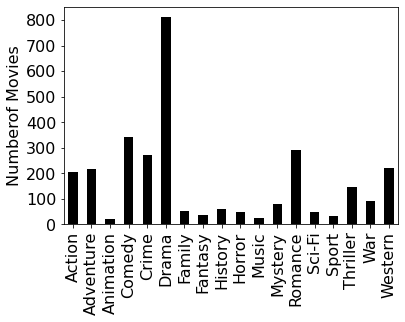

In [35]:
#q29

def filter_movies(movies, year1,year2):
    x=copy.copy(movies)
    i = 0
    while i < len(x):
        if x[i]["year"] < year1:
            x.pop(i)
        elif x[i]["year"]>year2:
            x.pop(i)
        else:
            i += 1
    return x


def q29(data, key):
    a=bucketize(data,key)
    c = {}
    for i in a:
        c[i]=len(a[i])
    return c

plot_dict(q29(filter_movies(movies,0,2000),"genres"), "Numberof Movies")

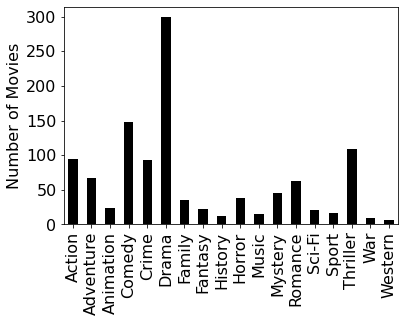

In [36]:
#q30

plot_dict(q29(filter_movies(movies,2000,10000),"genres"), "Number of Movies")

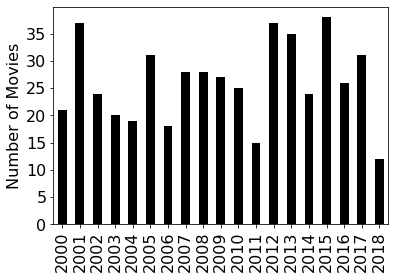

In [37]:
#q31
plot_dict(q29(filter_movies(movies,2000, 10000),"year"), "Number of Movies")

In [38]:
#just a record of hardwork
#directors_num_movies=q29(filter_movies(movies,2000,10000),"directors")
#list_directors={}
#for i in directors_num_movies:
#   if directors_num_movies[i]!=1:
 #       list_directors[i]=directors_num_movies[i]
#movies_list={}
#for i in list_directors:
 #   a=[]
  #  for idx in movies:
   #     if i in idx["directors"]  :
    #        a.append(idx["year"])
    #movies_list[i]=a

#for i in movies_list:
    #movies_list[i].sort()
    #print(movies_list[i][-1]-movies_list[i][0])
    

#higher = {"A": 1, "B": 2, "C": 3}
#lower = {"A": 2, "B": 4, "C": 4}
#result = {}
#for key in higher:
#    result[key] = higher[key] -lower[key]
#result


In [39]:
#q32
def q32(key,year):
    category=bucketize(movies,key)
    time={}
    for i in category:
        y=[]
        for idx in category[i]:
            y.append(idx["year"])
        time[i]=y
    
    for i in time:
        time[i].sort()
        time[i]=time[i][-1]-time[i][0]

    final={}
    for i in time:
        if time[i]>=year:
            final[i]=time[i]
    return final
q32("directors",30)

{'Howard Hawks': 42,
 'Charles Chaplin': 34,
 'Henry Hathaway': 36,
 'Stanley Kubrick': 46,
 'Taylor Hackford': 32,
 'Cecil B. DeMille': 30,
 'Lee H. Katzin': 30,
 'Richard Fleischer': 32,
 'Sidney Lumet': 33,
 'George Sherman': 33,
 'John Huston': 30,
 'Robert Siodmak': 30,
 'Eldar Ryazanov': 31,
 'Martin Ritt': 32}

In [40]:
#q33
q32("actors",50)

{'Kurt Russell': 50,
 'Mickey Rooney': 75,
 'Robert Mitchum': 51,
 'Glenn Ford': 52,
 'James Caan': 52,
 'Anthony Quinn': 61,
 'George Burns': 60,
 'Dean Stockwell': 53}

In [41]:
#q34
def row_ranking(row):
    return row["span"]

def top_n_span(buckets, n):
    spans = q32(buckets,30)
    rows = []
    for name in spans:
        span = spans[name]
        rows.append({"name": name, "span": span})
    rows.sort(key=row_ranking, reverse=True)
    return rows[0:n]
top_n_span("directors", 10)


[{'name': 'Stanley Kubrick', 'span': 46},
 {'name': 'Howard Hawks', 'span': 42},
 {'name': 'Henry Hathaway', 'span': 36},
 {'name': 'Charles Chaplin', 'span': 34},
 {'name': 'Sidney Lumet', 'span': 33},
 {'name': 'George Sherman', 'span': 33},
 {'name': 'Taylor Hackford', 'span': 32},
 {'name': 'Richard Fleischer', 'span': 32},
 {'name': 'Martin Ritt', 'span': 32},
 {'name': 'Eldar Ryazanov', 'span': 31}]

In [42]:
#q35
top_n_span("actors", 10)

[{'name': 'Mickey Rooney', 'span': 75},
 {'name': 'Anthony Quinn', 'span': 61},
 {'name': 'George Burns', 'span': 60},
 {'name': 'Dean Stockwell', 'span': 53},
 {'name': 'Glenn Ford', 'span': 52},
 {'name': 'James Caan', 'span': 52},
 {'name': 'Robert Mitchum', 'span': 51},
 {'name': 'Kurt Russell', 'span': 50},
 {'name': 'Robert De Niro', 'span': 49},
 {'name': 'Marlon Brando', 'span': 49}]

In [43]:
#q36
def q36(bucket,category):
    group=bucketize(movies,bucket)
    group_by={}
    for i in group:
        y=[]
        for idx in group[i]:
            y.append(idx[category])
        y.sort()
        if len(y)%2==1:
            median=y[len(y)//2]
        else:
            median=(y[(len(y)//2)-1]+y[len(y)//2])/2
        group_by[i]=median
        #count=len(group[i])   
    return group_by

def row_ranking(row):
    return row["rating"]

def top_n_count(buckets, category,n,minmum):
    rating = q36(buckets,category)
    rows = []
    for i in rating:
        median = rating[i]
        count=len(bucketize(movies,buckets)[i])
        if count < minmum:
            continue
        else:
            rows.append({"category": i, "rating": median,"count":count})
    rows.sort(key=row_ranking, reverse=True)
    return rows[0:n]
top_n_count("genres", "rating",3,0)
    


[{'category': 'Animation', 'rating': 7.3, 'count': 45},
 {'category': 'History', 'rating': 6.7, 'count': 73},
 {'category': 'War', 'rating': 6.7, 'count': 99}]

In [44]:
#q37
top_n_count("year", "rating",10,0)

[{'category': 1921, 'rating': 8.3, 'count': 1},
 {'category': 1925, 'rating': 8.2, 'count': 1},
 {'category': 1919, 'rating': 7.5, 'count': 1},
 {'category': 1923, 'rating': 7.3, 'count': 2},
 {'category': 1962, 'rating': 7.2, 'count': 17},
 {'category': 1964, 'rating': 7.1, 'count': 19},
 {'category': 1957, 'rating': 7.0, 'count': 24},
 {'category': 1985, 'rating': 7.0, 'count': 17},
 {'category': 1976, 'rating': 7.0, 'count': 17},
 {'category': 1963, 'rating': 6.95, 'count': 10}]

In [45]:
#q38
top_n_count("year", "rating",5,10)

[{'category': 1962, 'rating': 7.2, 'count': 17},
 {'category': 1964, 'rating': 7.1, 'count': 19},
 {'category': 1957, 'rating': 7.0, 'count': 24},
 {'category': 1985, 'rating': 7.0, 'count': 17},
 {'category': 1976, 'rating': 7.0, 'count': 17}]

In [46]:
#q39
top_n_count("directors", "rating",4,3)

[{'category': 'Christopher Nolan', 'rating': 8.5, 'count': 9},
 {'category': 'Leonid Gayday', 'rating': 8.4, 'count': 5},
 {'category': 'Stanley Kubrick', 'rating': 8.3, 'count': 11},
 {'category': 'Sergio Leone', 'rating': 8.3, 'count': 7}]

In [47]:
#q40
top_n_count("actors", "rating",3,5)

[{'category': 'Henry Bergman', 'rating': 8.2, 'count': 5},
 {'category': 'Ioan Gruffudd', 'rating': 8.2, 'count': 6},
 {'category': 'Robert Lindsay', 'rating': 8.2, 'count': 6}]